<a href="https://colab.research.google.com/github/Hasby23/Tugas_Besar_AI/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>1. Import module yang dibutuhkan</h3>

In [44]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [45]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

In [46]:
!git clone https://github.com/Hasby23/Tugas_Besar_AI.git

fatal: destination path 'Tugas_Besar_AI' already exists and is not an empty directory.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [28]:
imagePaths = '/content/drive/MyDrive/Colab Notebooks/Tugas_Besar_AI/Dataset/'
label_list = ['Kemangi', 'Seledri']
data = []
labels = []

In [29]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [30]:
np.array(data).shape

(100, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [31]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [32]:
print(labels)

['Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi' 'Kemangi'
 'Kemangi' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Sele

In [33]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [35]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h3>5. Build CNN Architecture</h3>

In [36]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [38]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [39]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [40]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 150ms/step - loss: 0.8218 - accuracy: 0.4500 - val_loss: 0.8542 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 57ms/step - loss: 0.7105 - accuracy: 0.5375 - val_loss: 0.6376 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 62ms/step - loss: 0.7203 - accuracy: 0.4750 - val_loss: 0.6509 - val_accuracy: 0.7500
Epoch 4/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6557 - accuracy: 0.6125 - val_loss: 0.6685 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6531 - accuracy: 0.5875 - val_loss: 0.5903 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 57ms/step - loss: 0.6100 - accuracy: 0.7750 - val_loss: 0.5411 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 60ms/step - loss: 0.5563 - accuracy: 0.8250 - val_loss: 0.5280 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

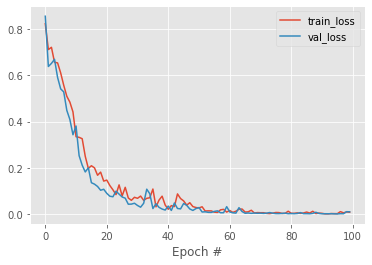

In [41]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [42]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

     Kemangi       1.00      1.00      1.00        12
     Seledri       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [43]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_lion.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

AttributeError: ignored

In [ ]:
if q_pred<=0.5 :
    target = "Elephant"
else :
    target = "Lion"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose